# 線形回帰モデル

## 回帰問題 

- ある入力（離散あるいは連続値）から出力（連続値）を予測する。

### 線形回帰
- 直線で予測する
- ざっくり説明すると比例

数学で記載すると、$y = Ax + B$（２次元）や、平面だと$z = Ax + By + C$（３次元）といった書き方になる。

#### $n$次元空間における超平面の方程式


\begin{aligned}
y &= a_0 + a_1\,x_1 + a_2\,x_2 + \ldots + a_{n-1}\,x_{n-1} \\[8px]
  &= a_0 + \sum_{i=1}^{n-1}  \; a_i \; x_i \\[8px]
  &= \sum_{i=0}^{n-1}  \;  a_i \; x_i \\[8px]
\end{aligned}
※$x_0=1$とする

$ \sum_{i=0}^{n-1} a_ix_i$の部分を行列で表すと、

\begin{aligned}
\mathbf{a}
  &=
  \left(
    \begin{array}{c}
      a_0 \\
      a_1 \\
      \vdots \\
      a_{n-1}
    \end{array}
  \right) \\[8px]
\mathbf{a}^T
  &=
  \left(
    \begin{array}{cccc}
      a_0 & a_1 & \ldots & a_{n-1}
    \end{array}
  \right) \\[8px]
\mathbf{x}
  &=
  \left(
    \begin{array}{c}
      x_0 \\
      x_1 \\
      \vdots \\
      x_{n-1}
    \end{array}
  \right) \\
\end{aligned}

$n$次元空間における超平面の方程式を行列で記述すると、

\begin{aligned}
y &= \mathbf{a}^T \; \mathbf{x} \\[8px]
  &= \left(
    \begin{array}{cccc}
      a_0 & a_1 & \ldots & a_{n-1}
    \end{array}
  \right)
  \left(
    \begin{array}{c}
      x_0 \\
      x_1 \\
      \vdots \\
      x_{n-1}
    \end{array}
  \right) \\[8px]
\end{aligned}

### 例
- あるお店の来店者数を入力にして、売り上げを出力とする。
- ランキングを求める事もできる。

#### バクニックの原理（回帰問題でランキングは解くべきでない。本来やりたい事より難しい問題を解くべきではない。）
#### 密度比推計の[参考](https://speakerdeck.com/oshokawa/mi-du-bi-tui-ding-niyoruyi-chang-jian-zhi?slide=34)（E資格には出てこない）


### 非線形回帰
- 曲線で予測する

## 回帰で扱うデータ

- 入力（各要素を説明変数または特徴量と呼ぶ） \
m次元のベクトル（$m=1$の場合はスカラー）
\begin{aligned}
\mathbf{x}
  &=
  \left(
    \begin{array}{cccc}
      x_1 & x_2 & \ldots & x_m
    \end{array}
  \right)^T \in \mathbb{R}^m \\[8px]
\end{aligned}

- 出力（目的変数） \
スカラー値
\begin{aligned}
 y \in \mathbb{R}^1
\end{aligned}

※$\mathbb{R}$は、実数全体を表す。 \
※$\mathbb{R}^m$は、m次元の実数である。

### 線形回帰モデル
- 回帰問題を解くための機械学習モデルのひとつ
- 教師あり学習（教師データから学習）
- 入力とm次元パラメータの線形結合を出力するモデル。

#### パラメータ
\begin{aligned}
\mathbf{w}
  &=
  \left(
    \begin{array}{cccc}
      w_1 & w_2 & \ldots & w_m
    \end{array}
  \right)^T \in \mathbb{R}^m \\[8px]
\end{aligned}

#### 線形結合
- 予測値にはハットをつける。（$y$ は実績、$\hat{y}$ は予測値）
\begin{aligned}
\hat{y} &= \mathbf{w}^T \; \mathbf{x} +w_0 \\[8px]
  &= \sum_{j=1}^{m}  \; w_j \; x_j + w_0 \\[8px]
\end{aligned}

パラメータ$\mathbf{w}$が未知の値であり、このパラメータを求めたい。 \
最小二乗法により推定する。

# ハンズオン

In [1]:
import numpy as np
# グラフ描画
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import seaborn as sns
# ボストンの住宅情報
from sklearn.datasets import load_boston
# 回帰分析
from sklearn.linear_model import LinearRegression
# 訓練データと検証データの分割
from sklearn.model_selection import train_test_split
# データを扱う
import pandas as pd

In [3]:
boston = load_boston()
# ボストンの家賃のデータの各項目
## CRIM		町ごとの一人当たりの犯罪率
## ZN		宅地の比率が25,000平方フィートを超える敷地に区画されている。
## INDUS	町当たりの非小売業エーカーの割合
## CHAS		チャーリーズ川ダミー変数（川の境界にある場合は1、それ以外の場合は0）
## NOX		一酸化窒素濃度（1000万分の1）
## RM		1住戸あたりの平均部屋数
## AGE		1940年以前に建設された所有占有ユニットの年齢比率
## DIS		5つのボストンの雇用センターまでの加重距離
## RAD		ラジアルハイウェイへのアクセス可能性の指標
## TAX		10,000ドルあたりの税全額固定資産税率
## PTRATIO	生徒教師の比率
## B		町における黒人の割合
## LSTAT	人口当たり地位が低い率
## MEDV		1000ドルでの所有者居住住宅の中央値

# ボストンの家賃のデータを表形式で表示
df=pd.DataFrame(boston.data ,columns=boston.feature_names)
df.head()

C:\Users\takas\anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing d

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

## 相関係数の算出、描画

In [4]:
# 相関係数の算出 (０は相関がない、１・－１のどちらかに近づけば相関がある)
df_chk=df
df_chk['TARGET']=boston.target
df_chk.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
TARGET  -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT    TARGET  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
TARGET   0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

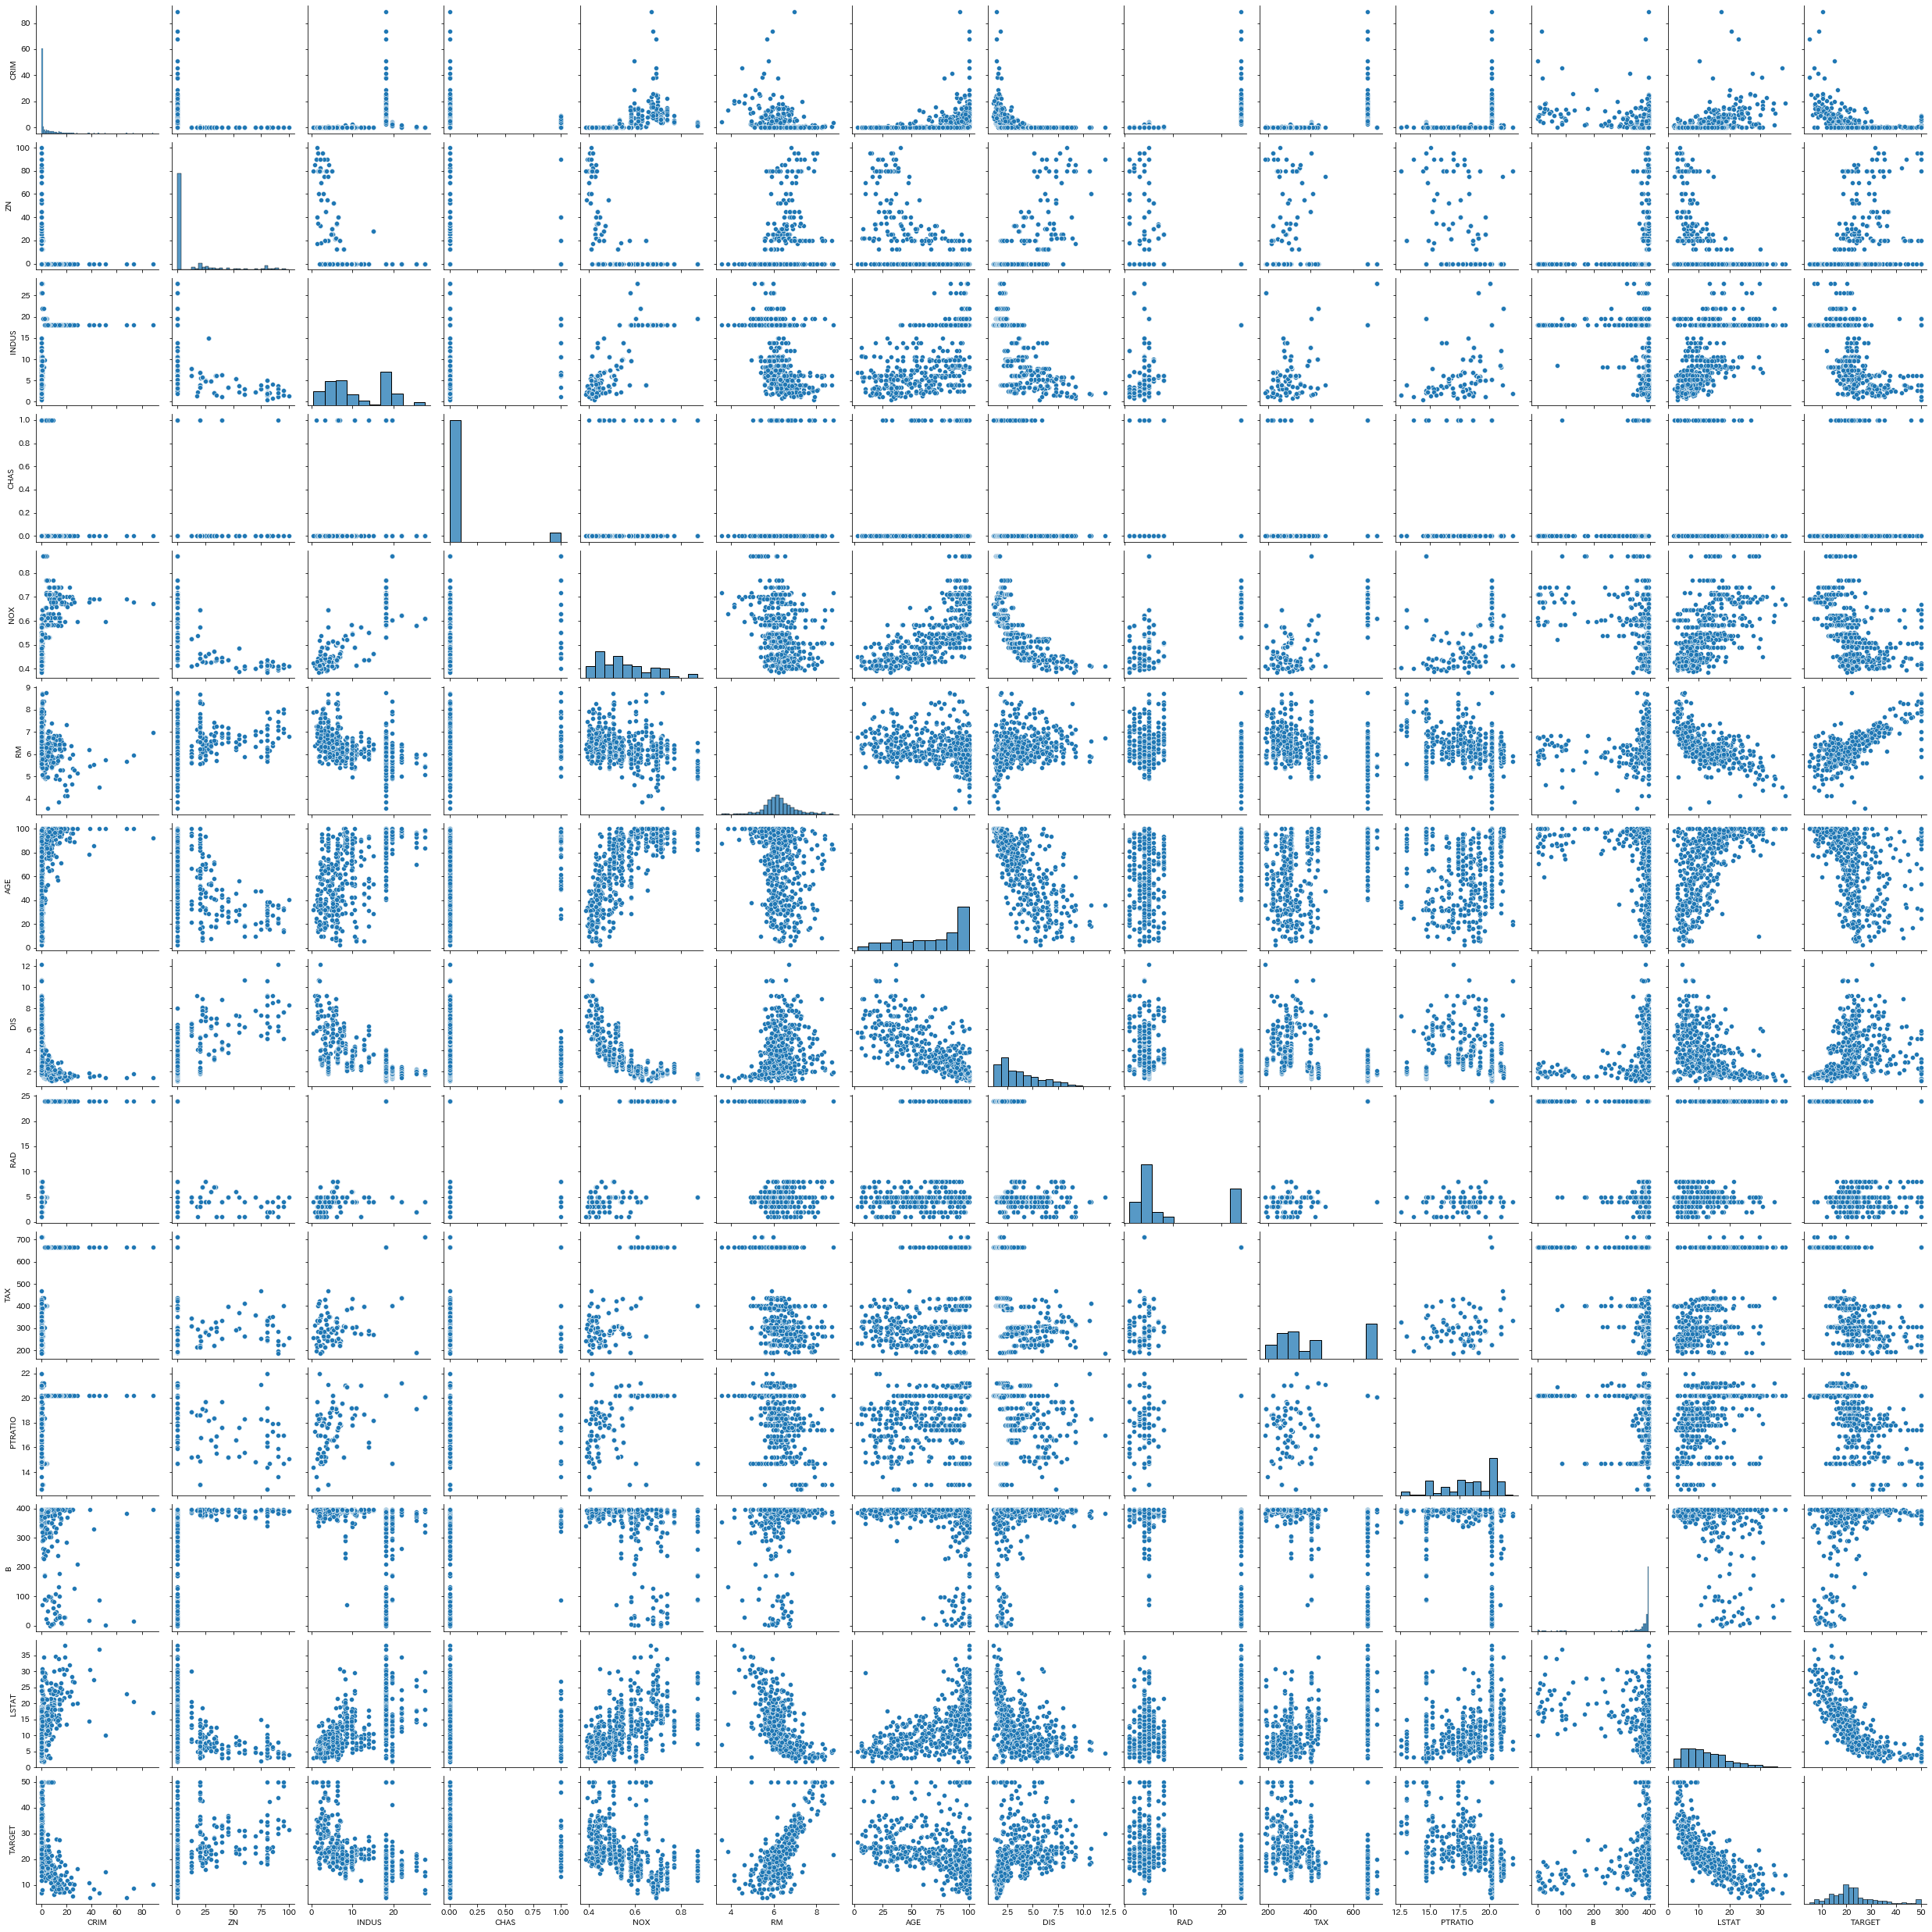

In [5]:
## matplotlib が使えることが前提
%matplotlib inline
import seaborn as sns

#ペアプロット図
# 相関関係を目視で確認
sns.pairplot(df_chk)

C:\Users\takas\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RM', ylabel='Density'>

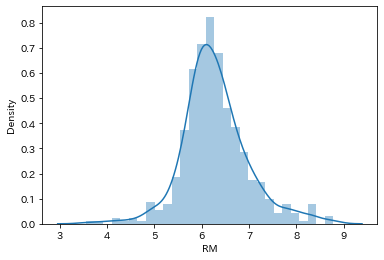

In [6]:
# 分布の確認　（正規分布となっていることを確認）
sns.distplot(df['RM'])

In [7]:
# 入力データ
x = df.iloc[:,5:6]
x.head()

RM
0  6.575
1  6.421
2  7.185
3  6.998
4  7.147

C:\Users\takas\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TARGET', ylabel='Density'>

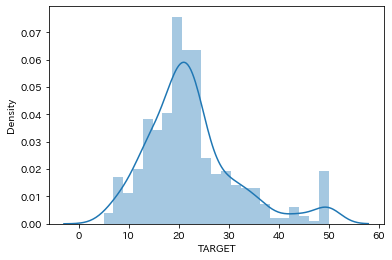

In [8]:
# 結果データ
y = pd.DataFrame(boston.target ,columns=['TARGET'])
y.head()
# 分布の確認　（正規分布となっていることを確認）
sns.distplot(y['TARGET'])

<function matplotlib.pyplot.show(close=None, block=None)>

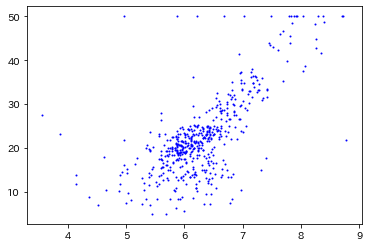

In [9]:
# 散布図（入力データと出力データを描画する）
# この図に
plt.scatter(x ,y ,s=1,c='blue')
plt.show

## 訓練データと検証データに分割する

In [10]:
# 訓練データと検証データの分割
X_train,X_test,y_train,y_test=train_test_split(x, y, test_size=0.4, random_state=1) #random_stateは再現性を確保するために指定する

## 学習する

In [11]:
#線回帰モデルの定義
model = LinearRegression()
# モデルの学習
model.fit(X_train ,y_train)

LinearRegression()

In [12]:
# 求まったパラメータの結果
a = model.coef_               ##傾き
b = model.intercept_          ##切片
print('a',a)
print('b',b)

a [[9.33080938]]
b [-36.12100929]


<function matplotlib.pyplot.show(close=None, block=None)>

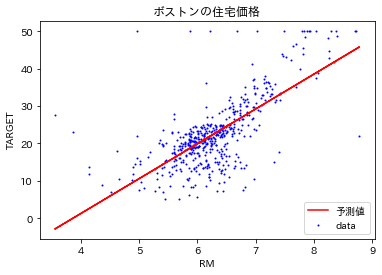

In [13]:
# 散布図 （予測結果を描画する）
y_hat= a * x + b
plt.scatter(x,y,s=1,c='blue',label= 'data')
plt.plot(x , y_hat, c='red' ,label='予測値')


plt.legend(loc='lower right')
plt.title('ボストンの住宅価格')    
plt.xlabel('RM')   
plt.ylabel('TARGET')   

plt.show

## 誤差の確認

In [14]:
# 入力データに対して
y_hat=model.predict(x)
err=y_hat - y
print(err)

       TARGET
0    1.229062
1    2.192118
2   -3.779144
3   -4.224005
4   -5.633715
..        ...
501  2.997017
502  0.383544
503  5.070717
504  5.272510
505  8.243771

[506 rows x 1 columns]


C:\Users\takas\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

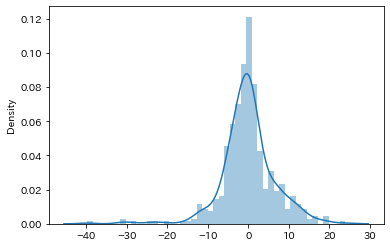

In [15]:
# 分布の確認 →　正規分布に従っているなら回帰分析は可能
sns.distplot(err)

In [73]:
# 入力データに対して
y_test_hat=model.predict(X_test)
err=y_test_hat - y_test
print(err)

        TARGET
307  -0.414296
343   2.458090
47    3.543771
67   -3.274512
362  -6.889209
..         ...
186 -13.051441
372 -31.302504
442   3.507294
412 -10.838023
213  -4.737099

[203 rows x 1 columns]


C:\Users\takas\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

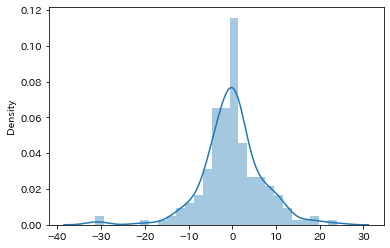

In [74]:
# 分布の確認 →　正規分布に従っているなら回帰分析は可能
sns.distplot(err)

## 予測精度確認

In [52]:
# 予測精度確認（学習データ）
model.score(X_train ,y_train)

0.4907544465829954

In [53]:
# 予測精度確認（検証データ）
#  学習データと値が近いと良い
model.score(X_test,y_test)

0.46948989292951204

#### ⇒外れ値除去前と比べて差異が少なくなった。

# 外れ値除去
（イレギュラーな値を見つけて、モデルを求める際の入力データから除く）

正規分布に従っていることが、３σ法で除去できる条件である。

In [47]:
df2 = pd.concat([X_train, y_train] ,axis=1)

In [50]:
# 標準偏差(Standard deviation)
sigma=df2.std()
sigma

RM        0.672760
TARGET    8.960807
dtype: float64

In [51]:
# 平均
mean = df2.mean()
mean

RM         6.240997
TARGET    22.112541
dtype: float64

In [52]:
df2.describe()

RM      TARGET
count  303.000000  303.000000
mean     6.240997   22.112541
std      0.672760    8.960807
min      3.863000    5.000000
25%      5.870000   16.750000
50%      6.167000   20.600000
75%      6.582500   25.000000
max      8.398000   50.000000

In [53]:
df2.head()

RM  TARGET
452  6.297    16.1
346  5.898    17.2
295  6.678    28.6
88   7.007    23.6
322  6.041    20.4

## 説明変数（RM）列の外れ値除去

In [54]:
# 外れ値の下限 (平均の値から、標準偏差の２倍の差がある）
low=mean['RM']-2* sigma['RM']
low

4.895477380460137

In [55]:
# 外れ値の上限 (平均の値から、標準偏差の２倍差異がある）
high=mean['RM']+2 * sigma['RM']
high

7.586516018879796

In [56]:
# ３σ法によって、外れ値を除去する　（全体の3%にあたる情報を削除する）
df2=df2[(df2['RM']>low) & (df2['RM']<high)]
df2.head()

RM  TARGET
452  6.297    16.1
346  5.898    17.2
295  6.678    28.6
88   7.007    23.6
322  6.041    20.4

In [57]:
df2.describe()

RM      TARGET
count  285.000000  285.000000
mean     6.195691   21.194386
std      0.525639    7.459806
min      4.903000    5.000000
25%      5.871000   16.700000
50%      6.152000   20.400000
75%      6.495000   24.500000
max      7.454000   50.000000

## 目的変数（TARGET）の列の外れ値除去

In [58]:
# 外れ値の下限 (平均の値から、標準偏差の２倍の差がある）
low=mean['TARGET']-2* sigma['TARGET']
low

4.190926665958077

In [59]:
# 外れ値の上限 (平均の値から、標準偏差の２倍差異がある）
high=mean['TARGET']+2 * sigma['TARGET']
high

40.03415584229275

In [60]:
# ３σ法によって、外れ値を除去する　（全体の3%にあたる情報を削除する）
df2=df2[(df2['TARGET']>low) & (df2['TARGET']<high)]
df2.head()

RM  TARGET
452  6.297    16.1
346  5.898    17.2
295  6.678    28.6
88   7.007    23.6
322  6.041    20.4

In [61]:
df2.describe()

RM      TARGET
count  281.000000  281.000000
mean     6.193769   20.805694
std      0.518044    6.748648
min      4.903000    5.000000
25%      5.871000   16.600000
50%      6.152000   20.300000
75%      6.495000   24.300000
max      7.416000   37.900000

# 学習する

In [70]:
#線回帰モデルの定義
model2 = LinearRegression()
# モデルの学習
X2_train=df2.iloc[:,0:1]
y2_train=df2.iloc[:,-1:]
model2.fit( X2_train , y2_train)

LinearRegression()

In [68]:
# 求まったモデルの結果
a2 = model2.coef_               ##傾き
b2 = model2.intercept_          ##切片
print('a',a2)
print('b',b2)

a [[8.52301918]]
b [-31.98391535]


<function matplotlib.pyplot.show(close=None, block=None)>

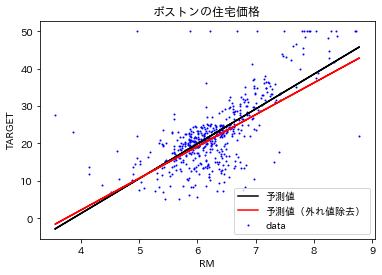

In [69]:
# 外れ値除去前データ 散布図 （予測結果を描画する）
y_hat2 = a2 * x + b2
plt.scatter(x,y,s=1,c='blue',label= 'data')
plt.plot(x , y_hat, c='black' ,label='予測値')
plt.plot(x , y_hat2, c='red' ,label='予測値（外れ値除去）')

plt.legend(loc='lower right')
plt.title('ボストンの住宅価格') 
plt.xlabel('RM')   
plt.ylabel('TARGET')   

plt.show

In [81]:
# 検証 <-訓練データ 
model2.score(X_train ,y_train)

0.4768578420998756

In [72]:
# 予測精度確認（検証データ）
#  学習データと値が近いと良い
model.score(X_test,y_test)

0.46948989292951204

## 誤差の確認

#### 外れ値除去後の値での予測結果

In [78]:
y_hat2=model2.predict(X2_train)
err=y_hat2 - y2_train
print(err)

        TARGET
452   5.585536
346   1.084852
295  -3.667193
88    4.136880
322  -0.896356
..         ...
255  -2.802655
72   -3.091804
396  10.106023
235  -4.112821
37   -3.124253

[281 rows x 1 columns]


C:\Users\takas\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

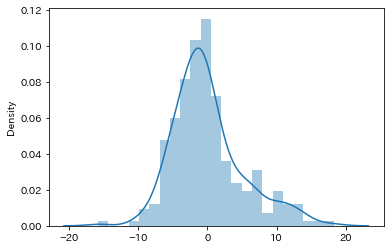

In [77]:
# 分布の確認 →　正規分布に従っているなら回帰分析は可能
sns.distplot(err)

#### ⇒外れ値除去前とべて誤差が大きいデータが少なくなった。

#### 外れ値除去前の値での予測結果

In [79]:
y_hat3=model2.predict(X_train)
err=y_hat3 - y_train
print(err)

        TARGET
452   5.585536
346   1.084852
295  -3.667193
88    4.136880
322  -0.896356
..         ...
255  -2.802655
72   -3.091804
396  10.106023
235  -4.112821
37   -3.124253

[303 rows x 1 columns]


C:\Users\takas\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

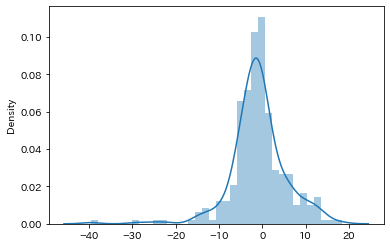

In [80]:
# 分布の確認 →　正規分布に従っているなら回帰分析は可能
sns.distplot(err)

#### ⇒外れ値除去前と比べて誤差が３０辺りが表示されなくなった。また、-10から10の範囲の高さが高くなった。
#### ⇒誤差の小さい値が増えた

In [82]:
y_test_hat2=model2.predict(X_test)
err=y_test_hat2 - y_test
print(err)

        TARGET
307  -1.809757
343   1.186221
47    2.809890
67   -3.885609
362  -7.083486
..         ...
186 -15.240152
372 -31.911178
442   2.620741
412 -10.439383
213  -5.749668

[203 rows x 1 columns]


C:\Users\takas\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

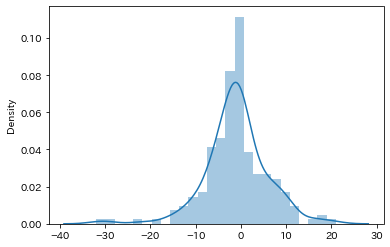

In [83]:
# 分布の確認 →　正規分布に従っているなら回帰分析は可能
sns.distplot(err)

#### ⇒外れ値除去前と比べて誤差が-３０辺りの高さが低くなった。
#### ⇒誤差０の高さが低くなったが、０付近の高さは高くなった。
#### ⇒誤差の小さい値が増えた